# Gas Prices and DEX Trading Volumes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## 1. Gas Price Chart (daily)

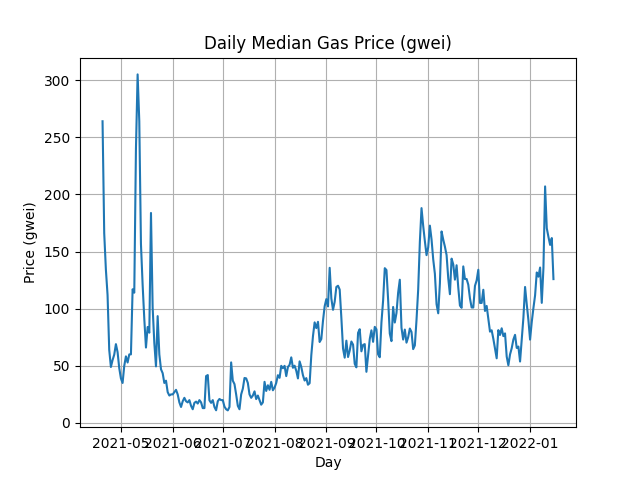

In [34]:
%matplotlib widget

Gas = pd.read_csv('./new_data/tmp/Gas Price.csv')
Gas['dt'] = pd.to_datetime(Gas['dt'])
plt.plot(Gas['dt'], Gas['median_gas_price_gwei'])
plt.title('Daily Median Gas Price (gwei)')
plt.xlabel('Day')
plt.ylabel('Price (gwei)')
plt.grid()

In [2]:
dir = './new_data/tmp/dex/'

In [3]:
Curve_Pool = pd.read_csv(dir + 'LUSD-3CRV Pool (100d).csv')
Curve_Swaps = pd.read_csv(dir + 'LUSD-3CRV Swaps (100d) (2).csv')
Uni_Pool = pd.read_csv(dir + 'LUSD-DAI Uniswap v3 (0.05%) (2).csv')
Uni_Swaps = pd.read_csv(dir + 'LUSD-DAI Volume Uniswap v3 (0.05%) (2).csv')

In [4]:
Curve_Pool

,hour,3crvBalance,lusdBalance,3crvPerLusd
0,2021-09-30T01:00:00+00:00,6.594271e+07,9.376575e+07,70.327068
1,2021-09-30T02:00:00+00:00,6.601497e+07,9.369189e+07,70.459641
2,2021-09-30T03:00:00+00:00,6.605056e+07,9.365551e+07,70.525013
3,2021-09-30T04:00:00+00:00,6.630022e+07,9.340035e+07,70.984986
4,2021-09-30T05:00:00+00:00,6.752207e+07,9.213010e+07,73.289912
...,...,...,...,...
1853,2022-01-09T18:00:00+00:00,9.873644e+07,9.449728e+07,104.486020
1854,2022-01-09T21:00:00+00:00,9.882744e+07,9.440452e+07,104.685075
1855,2022-01-10T02:00:00+00:00,1.001244e+08,9.335965e+07,107.245945
1856,2022-01-10T04:00:00+00:00,1.001676e+08,9.331568e+07,107.342699


In [5]:
Curve_Swaps

,hour,lusdDai,lusdUsdc,lusdUsdt,daiOut,usdcOut,usdtOut,lusdIn,daiIn,usdcIn,usdtIn,lusdOut
0,2021-09-30T01:00:00+00:00,0.996157,0.996147,0.996051,0.000000,29883.673995,70080.934326,-100358.041050,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,2021-09-30T02:00:00+00:00,0.996157,0.996147,0.997134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,7.365243e+04,-7.386414e+04
2,2021-09-30T03:00:00+00:00,0.996157,0.996147,0.997152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.627555e+04,-3.637914e+04
3,2021-09-30T04:00:00+00:00,0.996157,0.997120,0.997194,0.000000,19925.336049,0.000000,-20000.134495,0.000000,9.074119e+04,1.836602e+05,-2.751630e+05
4,2021-09-30T05:00:00+00:00,0.997051,0.997120,0.997455,0.000000,0.000000,0.000000,0.000000,266908.195705,0.000000e+00,1.000000e+06,-1.270249e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2022-01-09T18:00:00+00:00,0.999584,1.000543,1.000606,281743.784731,0.000000,0.000000,-281860.968251,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1652,2022-01-09T21:00:00+00:00,0.999584,1.000543,1.000650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.282176e+04,-9.276148e+04
1653,2022-01-10T02:00:00+00:00,1.000730,1.000696,1.000650,0.000000,0.000000,0.000000,0.000000,277485.230354,1.045594e+06,0.000000e+00,-1.322149e+06
1654,2022-01-10T04:00:00+00:00,1.000730,1.000724,1.000650,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+04,0.000000e+00,-4.396815e+04


In [6]:
dataframe = pd.DataFrame()

start_date = pd.to_datetime(datetime(2021, 10, 1, 0), utc=True)
end_date = pd.to_datetime(datetime(2021, 12, 25, 0), utc=True)

dataframe['hour'] = pd.date_range(start=start_date, end=end_date, freq='H')
dataframe.head()

,hour
0,2021-10-01 00:00:00+00:00
1,2021-10-01 01:00:00+00:00
2,2021-10-01 02:00:00+00:00
3,2021-10-01 03:00:00+00:00
4,2021-10-01 04:00:00+00:00


In [7]:
Curve_Swaps['hour'] = pd.to_datetime(Curve_Swaps['hour'])
Curve_Swaps = Curve_Swaps.merge(right=dataframe, how='outer', on='hour')
Curve_Swaps = Curve_Swaps.sort_values(by='hour').fillna(method='ffill').fillna(method='bfill')
Curve_Swaps[Curve_Swaps['hour'] <= end_date].tail(50)

,hour,lusdDai,lusdUsdc,lusdUsdt,daiOut,usdcOut,usdtOut,lusdIn,daiIn,usdcIn,usdtIn,lusdOut
2237,2021-12-22 23:00:00+00:00,1.000604,1.000815,1.000312,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.000000e+06,0.000000e+00,0.000000,-2.998189e+06
1431,2021-12-23 00:00:00+00:00,0.999663,1.000815,1.000265,1.284000e+05,0.000000e+00,0.000000,-1.284433e+05,0.000000e+00,0.000000e+00,586113.163182,-5.859576e+05
2238,2021-12-23 01:00:00+00:00,0.999663,1.000815,1.000265,1.284000e+05,0.000000e+00,0.000000,-1.284433e+05,0.000000e+00,0.000000e+00,586113.163182,-5.859576e+05
2239,2021-12-23 02:00:00+00:00,0.999663,1.000815,1.000265,1.284000e+05,0.000000e+00,0.000000,-1.284433e+05,0.000000e+00,0.000000e+00,586113.163182,-5.859576e+05
1432,2021-12-23 03:00:00+00:00,0.999663,1.000786,1.000265,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.767175e+05,0.000000,-1.765788e+05
1433,2021-12-23 04:00:00+00:00,1.000768,1.000786,1.000265,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.280000e+05,0.000000e+00,0.000000,-1.279017e+05
1434,2021-12-23 05:00:00+00:00,1.000768,0.999601,1.000265,0.000000e+00,4.000637e+06,0.000000,-4.002234e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1435,2021-12-23 06:00:00+00:00,1.000768,0.999682,1.000265,0.000000e+00,1.787939e+05,0.000000,-1.788918e+05,0.000000e+00,5.000000e+04,0.000000,-4.997492e+04
1436,2021-12-23 07:00:00+00:00,1.000768,1.000511,1.000265,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.940000e+05,0.000000,-1.939010e+05
1437,2021-12-23 08:00:00+00:00,1.000768,0.999424,1.000265,0.000000e+00,9.991101e+06,0.000000,-1.000000e+07,0.000000e+00,5.366496e+06,0.000000,-5.366452e+06


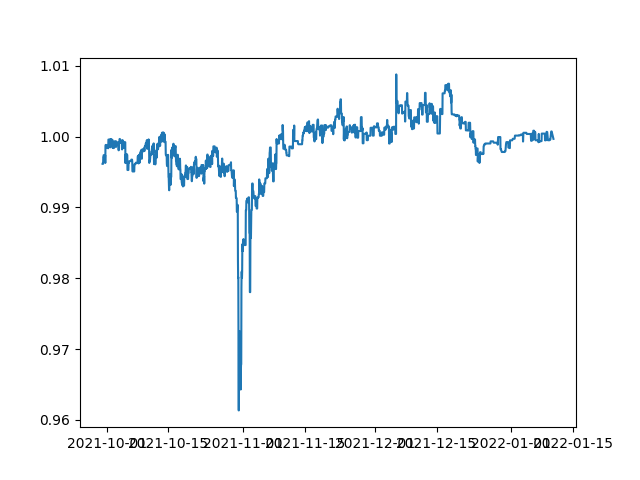

In [10]:
%matplotlib widget
plt.plot(Curve_Swaps['hour'], Curve_Swaps['lusdDai'])

In [23]:
Curve_Swaps.groupby([Curve_Swaps['hour'].dt.date])['lusdDai'].mean()

hour
2021-09-30    0.997314
2021-10-01    0.999056
2021-10-02    0.999115
2021-10-03    0.999095
2021-10-04    0.998980
                ...   
2022-01-06    1.000153
2022-01-07    0.999488
2022-01-08    1.000031
2022-01-09    0.999928
2022-01-10    1.000380
Name: lusdDai, Length: 103, dtype: float64

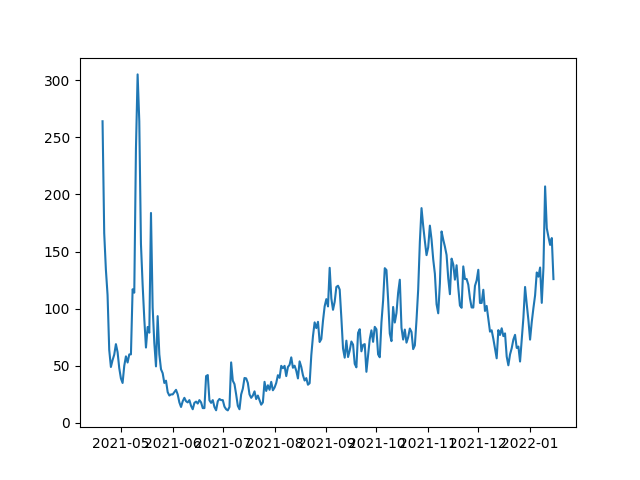